# Exercise 6.4 Supervised Machine Learning: Regression

This script contains the following:
1. Importing libraries and data
2. Data cleaning
3. Data preparation for regression analysis
4. Regression analysis

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically
%matplotlib inline

In [3]:
path=r"C:\Users\klein\Achievement 6 Project- Advanced Analytics & Dashboard Design"

In [4]:
fifa_21= pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'fifa_21_ratinglevel.csv'), index_col = False)

In [5]:
fifa_21.head()

,Unnamed: 0,sofifa_id,age,height_cm,weight_kg,nationality,league_rank,player_rating,potential,value_eur,wage_eur,player_positions,preferred_foot,work_rate,international_reputation,Rating Level
0,0,158023,33,170,72,Argentina,1.0,93,93,67500000,560000,"RW, ST, CF",Left,Medium/Low,5,High rating
1,1,20801,35,187,83,Portugal,1.0,92,92,46000000,220000,"ST, LW",Right,High/Low,5,High rating
2,2,200389,27,188,87,Slovenia,1.0,91,93,75000000,125000,GK,Right,Medium/Medium,3,High rating
3,3,188545,31,184,80,Poland,1.0,91,91,80000000,240000,ST,Right,High/Medium,4,High rating
4,4,190871,28,175,68,Brazil,1.0,91,91,90000000,270000,"LW, CAM",Right,High/Medium,5,High rating


# Data Cleaning

In [6]:
#Dropping the unnamed column
fifa_21.drop(columns=['Unnamed: 0'], inplace = True)

In [7]:
fifa_21.head()

,sofifa_id,age,height_cm,weight_kg,nationality,league_rank,player_rating,potential,value_eur,wage_eur,player_positions,preferred_foot,work_rate,international_reputation,Rating Level
0,158023,33,170,72,Argentina,1.0,93,93,67500000,560000,"RW, ST, CF",Left,Medium/Low,5,High rating
1,20801,35,187,83,Portugal,1.0,92,92,46000000,220000,"ST, LW",Right,High/Low,5,High rating
2,200389,27,188,87,Slovenia,1.0,91,93,75000000,125000,GK,Right,Medium/Medium,3,High rating
3,188545,31,184,80,Poland,1.0,91,91,80000000,240000,ST,Right,High/Medium,4,High rating
4,190871,28,175,68,Brazil,1.0,91,91,90000000,270000,"LW, CAM",Right,High/Medium,5,High rating


In [8]:
fifa_21.columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'nationality',
       'league_rank', 'player_rating', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'preferred_foot', 'work_rate',
       'international_reputation', 'Rating Level'],
      dtype='object')

In [10]:
#Dropping the unneeded columns
fifa_21_new = fifa_21[['sofifa_id', 'age', 'height_cm', 'weight_kg', 'nationality',
       'league_rank', 'player_rating', 'potential', 'value_eur', 'wage_eur']]

In [11]:
#Renaming the columns
fifa_21_new.rename(columns = {'sofifa_id' : 'Player ID', 'age' : 'Age', 'value_eur' : 'Market Value Euro', 'wage_eur' : 'Wages Euro'}, inplace = True)

C:\Users\klein\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [12]:
fifa_21_new

,Player ID,Age,height_cm,weight_kg,nationality,league_rank,player_rating,potential,Market Value Euro,Wages Euro
0,158023,33,170,72,Argentina,1.0,93,93,67500000,560000
1,20801,35,187,83,Portugal,1.0,92,92,46000000,220000
2,200389,27,188,87,Slovenia,1.0,91,93,75000000,125000
3,188545,31,184,80,Poland,1.0,91,91,80000000,240000
4,190871,28,175,68,Brazil,1.0,91,91,90000000,270000
...,...,...,...,...,...,...,...,...,...,...
18714,256679,24,176,73,Colombia,1.0,47,52,40000,500
18715,257710,21,177,70,China PR,1.0,47,52,35000,1000
18716,250989,20,185,74,China PR,1.0,47,51,35000,1000
18717,257697,23,186,80,China PR,1.0,47,51,40000,1000


# Missing values

In [13]:
#Check for missing values

fifa_21_new.isnull().sum()

#No missing values to handle

Player ID            0
Age                  0
height_cm            0
weight_kg            0
nationality          0
league_rank          0
player_rating        0
potential            0
Market Value Euro    0
Wages Euro           0
dtype: int64

Duplicates Check

In [14]:
dups = fifa_21_new.duplicated()

In [15]:
#No duplicates
dups.shape

(18719,)

Extreme values check

C:\Users\klein\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='player_rating', ylabel='Density'>

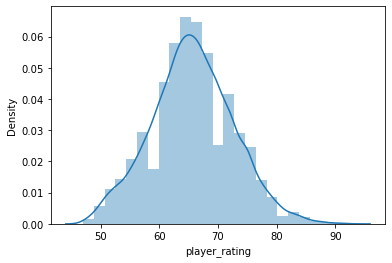

In [16]:
sns.distplot(fifa_21_new['player_rating'], bins=25) #shows extreme values

In [17]:
#Descriptive statistics
fifa_21_new['player_rating'].describe()

count    18719.000000
mean        65.635023
std          7.003908
min         47.000000
25%         61.000000
50%         66.000000
75%         70.000000
max         93.000000
Name: player_rating, dtype: float64

# 3. Data preparation for regression analysis

Hypothesis: If there is an increase in player wages then the higher their ratings

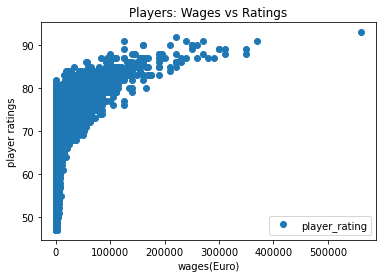

In [21]:
# create a scatterplot using matplotlib for another look at how the chosen variables plot against each other. 
fifa_21_new.plot(x = 'Wages Euro', y='player_rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Players: Wages vs Ratings')
plt.xlabel('wages(Euro)')
plt.ylabel('player ratings')
plt.show()

In [26]:
#Reshape the variables into Numpy arrays and put them into seperate objects

X = fifa_21_new['Wages Euro'].values.reshape(-1,1)
y = fifa_21_new['player_rating'].values.reshape(-1,1)

In [27]:
X

array([[560000],
       [220000],
       [125000],
       ...,
       [  1000],
       [  1000],
       [  2000]], dtype=int64)

In [28]:
y

array([[93],
       [92],
       [91],
       ...,
       [47],
       [47],
       [47]], dtype=int64)

In [29]:
#Split data into a training set and a test test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression analysis

In [30]:
#Create a regression object.
regression = LinearRegression()  #This is the regression object, which will be fit onto the training set

In [31]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [32]:
#Predict the value of y using x

y_predicted = regression.predict(X_test)

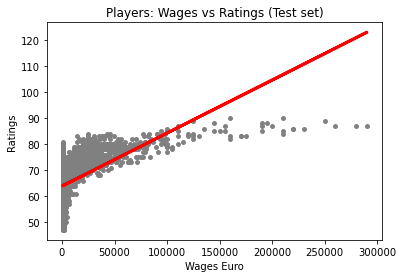

In [33]:
#Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Players: Wages vs Ratings (Test set)')
plot_test.xlabel('Wages Euro')
plot_test.ylabel('Ratings')
plot_test.show()

The trendline travels upwards diagonally from left to right showing a positive correlation between the variables. The data points are closer to the trendlines indicating a strong correlation as this confirms our hypothesis

In [34]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [35]:
#Print the model summary statistics. This is where you evaluate the performance of the model 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00020409]]
Mean squared error:  31.543083910269825
R2 score:  0.3441596977814342


The slope is positive and it indicates that if there is an increase in (X: Wages Euro) so does (Y: player ratings)
RMSE is 31.5 meaning the regression line is close to the data points
The R2 score is 0.344, this means the model isn't a good fit

In [36]:
y_predicted

array([[68.15211832],
       [64.27442593],
       [63.96829232],
       ...,
       [68.96847461],
       [64.68260407],
       [64.27442593]])

In [37]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,76,68.152118
1,67,64.274426
2,66,63.968292
3,57,63.968292
4,67,63.968292
5,64,64.478515
6,58,64.478515
7,58,63.968292
8,63,64.274426
9,59,63.968292


The relationship does not follow a single, straight line regression. Therfore, it wont be able to accurately predict the player ratings